# <center>HW2</center> #
####
***

## <u>Question 1 (1)</u>

### Implementation
* 本題需要使用三個學到的algorithms，Perceptron、AdalineGD、AdalineSGD進行資料的分類，因此演算法詳細的implementation將分為三部分撰寫
* 第一步先引入課本範例所給這三者演算法的架構，準備拿來之後調整參數、實作使用，由於是multi-class的分類法，故採用OVA(one versus all)來進行實作，OVA的實作方法具體上是取出其中一個類別當作positive，其他當作negative，進行binary classification，若有N個類別，則會存在N個classifier，讓這N個classifer利用**net_input** method個別算出結果後，取 **argmax** 便是我們真正預測的結果label，本題要將OVA方法應用至所有的algorithms中
* 由於data的class label不多，設計上從中選兩個features進行實作，方便視覺化，選擇的方式便是將各項feature兩兩抓出來畫出scatter plot
* 在觀察scatter plot的結果之後，我的設計上最後決定使用 **sepal width vs. petal width** 來分類
* 原因是這兩者feature所呈現的分布比較偏向linearly separable，對我們所選的這三種algorithms來說較好進行分類
* 決定好使用哪幾個features後，就開始對data進行預處理(pre-processing)，所採用的方式為切分training set and test set，並進行**數據標準化**
* 採用7:3的比例對data set進行切分，因此會有70%的dataset當作training set，而30%當作test set，前者拿去訓練model，後者來評估模型的效率
* 要注意到切分的時候，需要讓每種label的盡量都要出現，也就是要切的相對「均勻」
* 接著，便是第一個演算法Perceptron的實作
    * 我的調參方式是固定一個足以看出收斂情形的iter次數，就我的設計中為 **50** 次，然後用一個list設定 **20** 組可能使用到的learning rate(eta)，利用loop對每個eta都做一整輪的訓練(也就是iter次數跑過一輪的結果)，並將每一種eta所對應的準確度跟model儲存下來，在每輪的結尾去比較說準確度有沒有比前一輪高，若有就儲存下來，否則就保持高準確度的那組model，最終就可以獲得準確度最高的那組eta以及model
    * 在我的調整下，**當設定iter = 50次，eta = 0.0006最終能獲得 91.1%的accuracy**
    * 最後便是觀察loss curve還有decision boundary來更了解model的行為(於discussion部分探討)

* 設計一個簡單的flow chart:
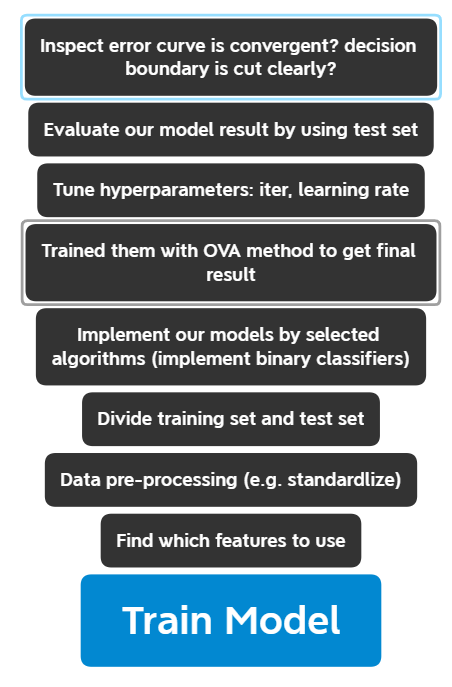


### Result & Codes

In [77]:
import os
import math
import numpy as np
import pandas as pd
%matplotlib inline
from IPython.display import HTML
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### functions for plot decision boundary for visualization

# To make the template "plot_decision_regions" function easier to use
def Draw(c1, c2, c3, points):
    ans = np.arange(len(points))
    out = [0, 0, 0]
    for i in range(len(points)):
        out[0] = c1.net_input(points[i])
        out[1] = c2.net_input(points[i])
        out[2] = c3.net_input(points[i])
        ans[i] = out.index(max(out[0], out[1], out[2]))
    return ans

def plot_decision_regions(X, y, classifier, classifier_1, classifier_2, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # use self-defined function to show the multiclass divided boundary results
    Z = Draw(classifier, classifier_1, classifier_2, np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')
        
### Plot the scatter graph to understand the data distribution
def find_feature(X, y, resolution = 0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))
                           
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
print('Import modules and define our functions successfully')


Import modules and define our functions successfully


In [78]:
# (1) Perceptron
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
# (2) Adaline
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# (3) Adaline SGD
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    
    
# Check whether all class are defined  successfully or not
if 'Perceptron'  in dir() and 'AdalineGD' in dir() and 'AdalineSGD' in dir():
    print('All class defintions prepared successfully!')
else:
    print('Some class definitions prepared unsuccessfully')

All class defintions prepared successfully!


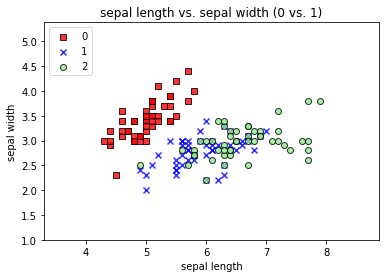

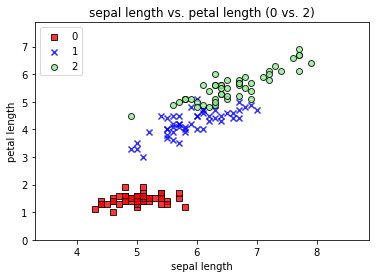

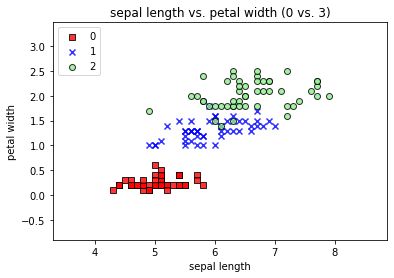

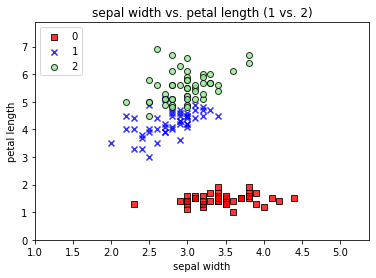

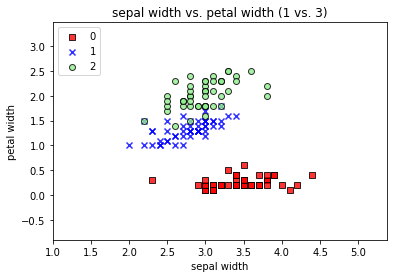

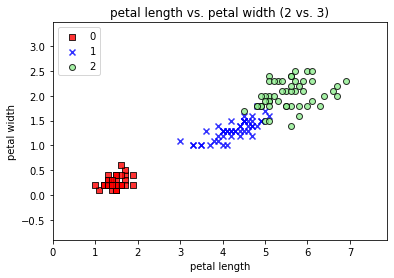

From these figures, choose (sepal width vs. petal width) to classifiy!


In [79]:
# Take two features for scatter plot
curr_dir = os.getcwd() + '\iris.data'
df = pd.read_csv(curr_dir, header = None)
features_dict = {0: 'sepal length', 1: 'sepal width', 2: 'petal length', 3: 'petal width'}
for i in range(3):
    for j in range(4):
        if i != j and i < j:
            find_feature(df.iloc[:, [i, j]].values, df.iloc[:, 4].values)
            plt.title(f'{features_dict[i]} vs. {features_dict[j]} ({i} vs. {j})')
            plt.legend(loc = 'upper left')
            plt.xlabel(features_dict[i])
            plt.ylabel(features_dict[j])
            plt.show()

print('From these figures, choose (sepal width vs. petal width) to classifiy!')

In [80]:
# Data preprocessing

# X = df.iloc[:, [2, 3]].values
X = df.iloc[:, [1, 3]].values # Best result now
y = df.iloc[:, 4].values

# Divide our data into 7:3 for training set and test set
# rememeber to stratify data
setosa_data, veriscolor_data, virginica_data = X[:50], X[50:100], X[100:]
X_train = np.concatenate((setosa_data[:35], veriscolor_data[:35], virginica_data[:35]))
X_test = np.concatenate((setosa_data[35:], veriscolor_data[35:], virginica_data[35:]))

setosa_label, veriscolor_label, virginica_label = y[:50], y[50:100], y[100:]
y_train = np.concatenate((setosa_label[:35], veriscolor_label[:35], virginica_label[:35])) 
y_test = np.concatenate((setosa_label[35:], veriscolor_label[35:], virginica_label[35:])) 

# Standardlize our train data
X_std_train = np.copy(X_train)
X_std_test = np.copy(X_test)
for i in range(2):
    X_std_train[:, i] = (X_train[:, i] - X_train[:, i].mean()) / X_train[:, i].std()
    X_std_test[:, i] = (X_test[:, i] - X_train[:, i].mean()) / X_train[:, i].std()

# Find corresponding label
y1, y2, y3 = np.where(y_train == 0, 1, -1), np.where(y_train == 1, 1, -1), np.where(y_train == 2, 1, -1)

# Prepared for plot decision boundary
X_combined = np.vstack((X_std_train, X_std_test))
y_combined = np.hstack((y_train, y_test))

print('Data has been preprocessed successfully!')

Data has been preprocessed successfully!


learning rate(eta) = 0.00005, accuracy = 0.778
learning rate(eta) = 0.00010, accuracy = 0.844
learning rate(eta) = 0.00015, accuracy = 0.889
learning rate(eta) = 0.00020, accuracy = 0.867
learning rate(eta) = 0.00025, accuracy = 0.756
learning rate(eta) = 0.00030, accuracy = 0.711
learning rate(eta) = 0.00035, accuracy = 0.889
learning rate(eta) = 0.00040, accuracy = 0.778
learning rate(eta) = 0.00045, accuracy = 0.711
learning rate(eta) = 0.00050, accuracy = 0.867
learning rate(eta) = 0.00055, accuracy = 0.844
learning rate(eta) = 0.00060, accuracy = 0.911
learning rate(eta) = 0.00065, accuracy = 0.844
learning rate(eta) = 0.00070, accuracy = 0.800
learning rate(eta) = 0.00075, accuracy = 0.844
learning rate(eta) = 0.00080, accuracy = 0.822
learning rate(eta) = 0.00085, accuracy = 0.867
learning rate(eta) = 0.00090, accuracy = 0.667
learning rate(eta) = 0.00095, accuracy = 0.889
Final accuracy: 0.911,  learning rate: 0.00060


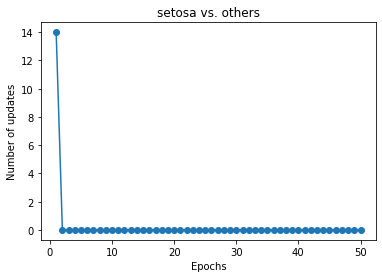

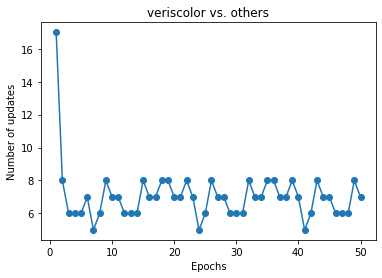

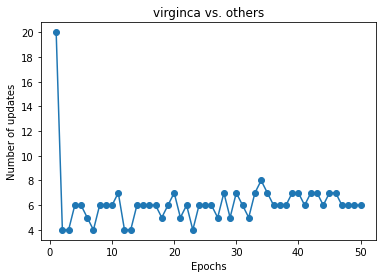

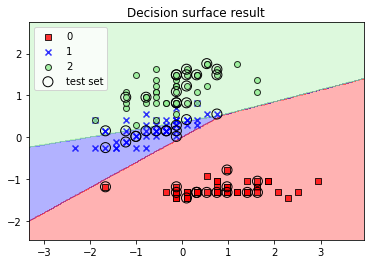

In [81]:
# Implementation for Perceptron

lr = [0.00005 * i for i in range(1, 20)]
acc_val = 0
lr_val = 0
iter_num = 50

ppn_f1, ppn_f2, ppn_f3 = None, None, None
for j in range(len(lr)):
    ppn_m1 = Perceptron(eta = lr[j], n_iter = iter_num)
    ppn_m2 = Perceptron(eta = lr[j], n_iter = iter_num)
    ppn_m3 = Perceptron(eta = lr[j], n_iter = iter_num)

    ppn_m1.fit(X_std_train, y1)
    ppn_m2.fit(X_std_train, y2)
    ppn_m3.fit(X_std_train, y3)

    # find max of these models
    out = [0, 0, 0]
    corr = 0

    for i in range(len(X_std_test)):
        out[0] = ppn_m1.net_input(X_std_test[i])
        out[1] = ppn_m2.net_input(X_std_test[i])
        out[2] = ppn_m3.net_input(X_std_test[i])
        if out.index(max(out)) == y_test[i]:
            corr += 1
    print(f'learning rate(eta) = {lr[j]:.5f}, accuracy = {corr / len(y_test):.3f}')
    if corr / len(y_test) > acc_val:
        acc_val = corr / len(y_test)
        lr_val = lr[j]
        ppn_f1, ppn_f2, ppn_f3 = ppn_m1, ppn_m2, ppn_m3

print(f'Final accuracy: {acc_val:.3f},  learning rate: {lr_val:.5f}')

# plot the loss curve, and discuss whether it converges or not
plt.plot(range(1, len(ppn_f1.errors_) + 1), ppn_f1.errors_, marker='o')
plt.title('setosa vs. others')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()
plt.plot(range(1, len(ppn_f2.errors_) + 1), ppn_f2.errors_, marker='o')
plt.title('veriscolor vs. others')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()
plt.plot(range(1, len(ppn_f3.errors_) + 1), ppn_f3.errors_, marker='o')
plt.title('virginca vs. others')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

# plot the boundary to inspect the data classification result
plot_decision_regions(X_combined, y_combined, ppn_f1, ppn_f2, ppn_f3, test_idx = range(105, 150))             
plt.title('Decision surface result')
plt.legend(loc = 'upper left')           
plt.show()

## <u>Question 1 (2)</u>

### Implementation
* 本小題使用第二種演算法**Adaline**進行實作，一樣記得使用OVA來進行multi-class分類
* Adaline主要與Perceptron的不同在於update weight的方式，以及計量error上使用sum square error去評估

    * 調參方式跟Perceptron類似，固定iter次數，就我的設計中為 **50** 次，然後挑選 **50** 組可能使用到的learning rate(eta)，利用loop對每個eta都做一整輪的訓練(也就是iter次數跑過一遍的結果)，並將每一種eta所對應的準確度跟model儲存下來，在每輪的結尾去比較說準確度有沒有比前一輪高，若有就儲存下來，否則就保持高準確度的那組model，最終就可以獲得準確度最高的那組eta以及model
    * 而loss curve這邊使用的不再像Perceptron中是number of update，而是sum square error，但仍希望error收斂且越小越好
    * 在我的調整下，**當設定iter = 50次，eta = 0.0005最終能獲得 88.9%的accuracy**
    * 由於使用OVA的關係，最後一樣觀察loss curve跟decision boundary result的切分圖來得到結論(於discussion部分探討)

### Result & Codes

learning rate(eta) = 0.00050, accuracy = 0.889
learning rate(eta) = 0.00100, accuracy = 0.889
learning rate(eta) = 0.00150, accuracy = 0.889
learning rate(eta) = 0.00200, accuracy = 0.889
learning rate(eta) = 0.00250, accuracy = 0.889
learning rate(eta) = 0.00300, accuracy = 0.889
learning rate(eta) = 0.00350, accuracy = 0.889
learning rate(eta) = 0.00400, accuracy = 0.889
learning rate(eta) = 0.00450, accuracy = 0.889
learning rate(eta) = 0.00500, accuracy = 0.889
learning rate(eta) = 0.00550, accuracy = 0.889
learning rate(eta) = 0.00600, accuracy = 0.889
learning rate(eta) = 0.00650, accuracy = 0.889
learning rate(eta) = 0.00700, accuracy = 0.889
learning rate(eta) = 0.00750, accuracy = 0.889
learning rate(eta) = 0.00800, accuracy = 0.889
learning rate(eta) = 0.00850, accuracy = 0.889
learning rate(eta) = 0.00900, accuracy = 0.889
learning rate(eta) = 0.00950, accuracy = 0.889
learning rate(eta) = 0.01000, accuracy = 0.889
learning rate(eta) = 0.01050, accuracy = 0.889
learning rate

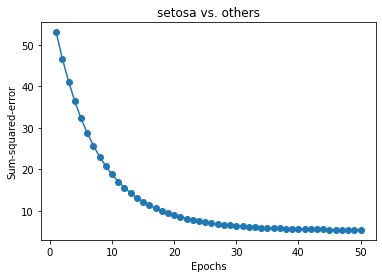

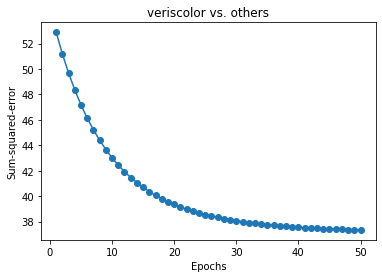

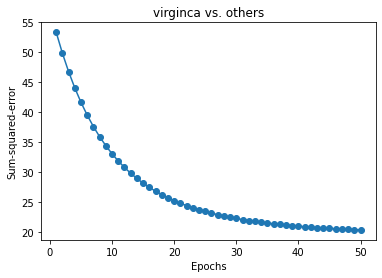

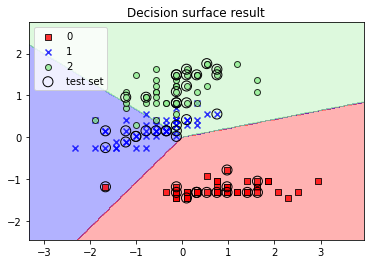

In [82]:
# Implementation for adaline

lr = [0.0005 * i for i in range(1, 50)]
Ada_acc_val = 0
Ada_lr_val = 0
ada_f1, ada_f2, ada_f3 = None, None, None
iter_num_ada = 50

for j in range(len(lr)):
    ada_m1 = AdalineGD(eta = lr[j], n_iter = iter_num_ada)
    ada_m2 = AdalineGD(eta = lr[j], n_iter = iter_num_ada)
    ada_m3 = AdalineGD(eta = lr[j], n_iter = iter_num_ada)

    ada_m1.fit(X_std_train, y1)
    ada_m2.fit(X_std_train, y2)
    ada_m3.fit(X_std_train, y3)

    # find max of these models
    out = [0, 0, 0]
    corr = 0

    for i in range(len(X_std_test)):
        out[0], out[1], out[2] = ada_m1.net_input(X_std_test[i]), ada_m2.net_input(X_std_test[i]), ada_m3.net_input(X_std_test[i])
        # print(out[0], out[1], out[2])
        if out.index(max(out)) == y_test[i]:
            corr += 1
    print(f'learning rate(eta) = {lr[j]:.5f}, accuracy = {corr / len(y_test):.3f}')
    if corr / len(y_test) > Ada_acc_val:
        Ada_acc_val = corr / len(y_test)
        Ada_lr_val = lr[j]
        ada_f1, ada_f2, ada_f3 = ada_m1, ada_m2, ada_m3

print(f'\nFinal accuracy: {Ada_acc_val:.3f},  learning rate: {Ada_lr_val:.5f}')

plt.plot(range(1, len(ada_f1.cost_) + 1), ada_f1.cost_, marker='o')
plt.title('setosa vs. others')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()
plt.plot(range(1, len(ada_f2.cost_) + 1), ada_f2.cost_, marker='o')
plt.title('veriscolor vs. others')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()
plt.plot(range(1, len(ada_f3.cost_) + 1), ada_f3.cost_, marker='o')
plt.title('virginca vs. others')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()


plot_decision_regions(X_combined, y_combined, ada_f1, ada_f2, ada_f3, test_idx = range(105, 150)) 
plt.title('Decision surface result')
plt.legend(loc = 'upper left')           
plt.show() 

## <u>Question 1 (3)</u>

### Implementation
* 本小題使用**Adaline**為基底進行實作，一樣記得使用OVA來進行multi-class分類，而且加入了SGD(Stochastic Gradient Descent)的嘗試
* SGD主要的概念是來優化原本普通的gradient descent，原本的需要一次將整組data set給吃進來，但SGD使用類似sample一個個batch的方式去update weights，因此適用於當data set龐大的時候會有不錯的效果，但由於我們iris.data無論組數還是特徵複雜度都不高，故我設計上認為使用SGD並不能夠有明顯的提升或優勢
    * 調參方式跟前面兩種演算法類似，固定iter次數，就我的設計中為 **80** 次，然後挑選 **20** 組可能使用到的learning rate(eta)，利用loop對每個eta都做一整輪的訓練(也就是iter次數跑過一遍的結果)，並將每一種eta所對應的準確度跟model儲存下來，在每輪的結尾去比較說準確度有沒有比前一輪高，若有就儲存下來，否則就保持高準確度的那組model，最終就可以獲得準確度最高的那組eta以及model
    * 由於loss function採用adaline的架構，因此一樣是採用sum square error來計量，同樣地希望error收斂且越小越好
    * 在我的調整下，**當設定iter = 80次，eta = 0.0001最終能獲得 88.9%的accuracy**
    * 由於使用OVA的關係，最後一樣觀察loss curve跟decision boundary result的切分圖來得到結論(於discussion部分探討)

### Result & Codes

learning rate(eta) = 0.00010, accuracy = 0.889
learning rate(eta) = 0.00020, accuracy = 0.889
learning rate(eta) = 0.00030, accuracy = 0.889
learning rate(eta) = 0.00040, accuracy = 0.889
learning rate(eta) = 0.00050, accuracy = 0.889
learning rate(eta) = 0.00060, accuracy = 0.889
learning rate(eta) = 0.00070, accuracy = 0.889
learning rate(eta) = 0.00080, accuracy = 0.889
learning rate(eta) = 0.00090, accuracy = 0.889
learning rate(eta) = 0.00100, accuracy = 0.889
learning rate(eta) = 0.00110, accuracy = 0.889
learning rate(eta) = 0.00120, accuracy = 0.889
learning rate(eta) = 0.00130, accuracy = 0.889
learning rate(eta) = 0.00140, accuracy = 0.889
learning rate(eta) = 0.00150, accuracy = 0.889
learning rate(eta) = 0.00160, accuracy = 0.889
learning rate(eta) = 0.00170, accuracy = 0.889
learning rate(eta) = 0.00180, accuracy = 0.889
learning rate(eta) = 0.00190, accuracy = 0.889

Final accuracy: 0.889,  learning rate: 0.00010


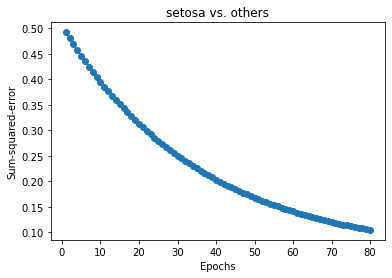

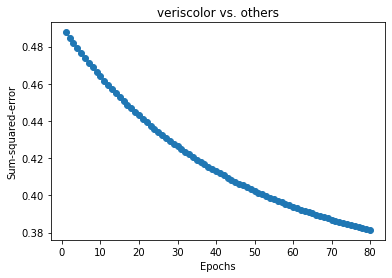

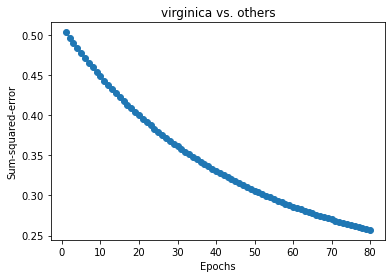

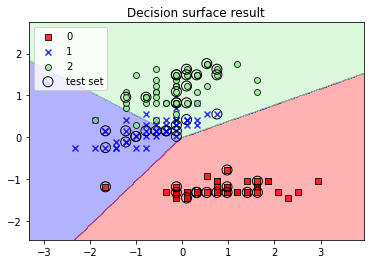

In [83]:
# Implementation for adaline SGD

lr = [0.0001 * i for i in range(1, 20)]
Ada_SGD_acc_val = 0
Ada_SGD_lr_val = 0
iter_num_ada_SGD = 80
ada_SGD_f1, ada_SGD_f2, ada_SGD_f3 = None, None, None


for j in range(len(lr)):
    ada_SGD_m1 = AdalineSGD(eta = lr[j], n_iter = iter_num_ada_SGD)
    ada_SGD_m2 = AdalineSGD(eta = lr[j], n_iter = iter_num_ada_SGD)
    ada_SGD_m3 = AdalineSGD(eta = lr[j], n_iter = iter_num_ada_SGD)

    ada_SGD_m1.fit(X_std_train, y1)
    ada_SGD_m2.fit(X_std_train, y2)
    ada_SGD_m3.fit(X_std_train, y3)

    # find max of these models
    out = [0, 0, 0]
    corr = 0

    for i in range(len(X_std_test)):
        out[0], out[1], out[2] = ada_SGD_m1.net_input(X_std_test[i]), ada_SGD_m2.net_input(X_std_test[i]), ada_SGD_m3.net_input(X_std_test[i])
        if out.index(max(out)) == y_test[i]:
            corr += 1
    print(f'learning rate(eta) = {lr[j]:.5f}, accuracy = {corr / len(y_test):.3f}')

    if corr / len(y_test) > Ada_SGD_acc_val:
        Ada_SGD_acc_val = corr / len(y_test)
        Ada_SGD_lr_val = lr[j]
        ada_SGD_f1, ada_SGD_f2, ada_SGD_f3 = ada_SGD_m1, ada_SGD_m2, ada_SGD_m3
print(f'\nFinal accuracy: {Ada_SGD_acc_val:.3f},  learning rate: {Ada_SGD_lr_val:.5f}')

plt.plot(range(1, len(ada_SGD_f1.cost_) + 1), ada_SGD_f1.cost_, marker='o')
plt.title('setosa vs. others')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()
plt.plot(range(1, len(ada_SGD_f2.cost_) + 1), ada_SGD_f2.cost_, marker='o')
plt.title('veriscolor vs. others')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()
plt.plot(range(1, len(ada_SGD_f3.cost_) + 1), ada_SGD_f3.cost_, marker='o')
plt.title('virginica vs. others')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

plot_decision_regions(X_combined, y_combined, ada_SGD_f1, ada_SGD_f2, ada_SGD_f3, test_idx = range(105, 150))
plt.title('Decision surface result')
plt.legend(loc = 'upper left')           
plt.show()

### Discussion

由於使用OVA的關係，可以觀察個別classifer的loss curve來得到一些推論<br>
以下將分別討論個別的loss curve圖以及decision boundary的切分情形
###### Question 1 (1)
>setosa類別最後能收斂至0，代表說能完美切分開來；<br>
veriscolor、viriginca類別皆不能收斂至0，而是有震盪的情況，代表說無法完美的linearly separable<br>
藉由boundary的切分圖可以證明上述兩者狀況，可以觀察到setosa的區域是成功分開的(紅色)，而另外兩者類別則無法切乾淨(藍色、綠色)，有模糊地帶的狀況發生，仔細觀察test set的分布情形可以發現，有些許test set是落於**藍vs.綠**的模糊地帶中，也就說明了為何最後僅達到 *91.1%* 準確率的結果

###### Question 1 (2)
> 從loss curve的圖可以觀察到，三個binary classifier的sum square error都能達到收斂的跡象，但仔細看會發現，類似於Perceptron的推論，在setosa的分類可以完美切分，而error也能降到幾乎為0，但另外兩者(veriscolor, virginca)雖然也有收斂的狀況，卻並沒有收斂至0，而是趨於某項正數，相當於此兩者data的分布導致切分沒辦法完美切開<br> 藉由最後boundary的切分圖可以發現，雖然切的方式與Perceptron不盡相同，但整體而言仍然將三者資料分類的不錯，儘管仍然有一部分是模糊地帶分不太清楚，而同樣地觀察test set的落點可以說明為何最後得到 *88.9%* 的準確率

###### Question 1 (3)
> 由於採用Adaline為基礎的演算法，只是加入了SGD的隨機性，但SGD對較大的data set會有更明顯的效果，因此可以推估對iris.data的影響應該不會太明顯<br>
同樣從loss curve的圖可以觀察到，三個binary classifier的sum square error都能達到收斂的跡象，類似地在setosa的分類可以完美切分，而error也能降到幾乎為0，但另外兩者(veriscolor, virginca)雖然也有收斂的狀況，卻並沒有收斂至0，而是趨於某項正數，意味著這兩類data的分布切分不完全<br> 
藉由最後boundary的切分圖，能發現其切分方式非常接近於Adaline的方法，但整體而言仍然將三者資料分類的不錯，儘管仍然有一部分是模糊地帶分不太清楚，而同樣地觀察test set的落點可以說明為何最後得到 *88.9%* 的準確率
   

總結，這三者演算法各有優缺，不可直接由這樣的準確率來決定孰優孰劣，我認為是因為data set本身的線性不可分造就了準確度的落差。經由這三個演算法的實作，可說是讓我更了解他們的用處，而可以發現當data set不是很好linearly separable時，準確率的高低便是看test set取樣的位置了，意味著如果運氣好test set取在非模糊地帶則可以達到更好的準確率。因此，實際上若要真正把data給切分乾淨的話，我認為可以考慮嘗試其他「非線性切分」的演算法來處理這樣線性不可分的data set<br>
除此之外，在實作上也要特別注意training set在標準化的時候不要牽涉到test set的data，否則就導致test set data提早被model給知道，如此一來的準度便不是真正model的效能了<br>

## <u>Question 2</u>

### Implementation
* 本題是使用所學的三個演算法，搭配UCI提供的wine.data，挑選出合適的進行實作，盡量設計出較佳的模型來評估效能
* 我的概念是將三種algorithms都實作一次，藉由準確率(accuracy)和loss的收斂情形來進行評估，最後再挑選效能較佳的model
* 首先，利用pandas套件將data讀進來，並輸出dataframe來觀察data的狀況，可以找出label位於哪個column，以及data共有幾個feature等資訊
* 接著利用Python中的Counter來找出共有幾個label，以及label分別的個數
* 選擇features種類的部分，由於共有13種features供選擇，因此我最終決定將所有features都納入考量，缺點是沒辦法明確地畫出切分圖(decision boundary)進行觀察，但是好處是features的複雜程度或許能提升模型的預測能力
* 然後進行training set 和 test set切分，這邊同樣地使用7:3的比例進行「均勻」切分，須注意三者label的個數不同，因此在均勻切分的時候要考慮比例
    > 125:53 for train set 跟 test set
    > $$125 *\frac{59}{178} = 41$$
    >
    > $$125 *\frac{71}{178} = 50$$
    >
    > $$125 - 41 - 50 = 34$$
* 執行**數據標準化**後就完成data預處理
* 由於採用了所有的features，因此較困難視覺化data切分的狀況，但仍舊可以藉由loss curve來觀察收斂情形以及model的表現
* 演算法本身的實作方式一樣利用OVA進行multi class分類，因此與前一題iris.data的分法相似度很高
* 以下簡單列出實作之結果，詳細討論將於後面discussion部分進行
    * 在我的調整下，**Perceptron設定iter = 50次，eta = 0.0001最終能獲得 100%的accuracy**
    * 在我的調整下，**Adaline設定iter = 200次，eta = 0.0001最終能獲得 98.1%的accuracy**
    * 在我的調整下，**Adaline(SGD)設定iter = 50次，eta = 0.0040最終能獲得 88.9%的accuracy**

### Result & Codes

In [84]:
curr_dir_wine = os.getcwd() + '\wine.data'
df_wine = pd.read_csv(curr_dir_wine, header = None)
print('Understand the wine.data')
df_wine

Understand the wine.data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [85]:
from collections import Counter
labels = df_wine.iloc[:, 0].values
label_kinds = np.unique(labels)
print(f'Class labels: {label_kinds}')
label_cnt = Counter(labels)
for i in range(len(label_kinds)):
    print(f'The numbers of {i + 1}-th label: {label_cnt[label_kinds[i]]} ')

Class labels: [1 2 3]
The numbers of 1-th label: 59 
The numbers of 2-th label: 71 
The numbers of 3-th label: 48 


In [86]:
# use about 7:3 to divide, the result is: 125:53 for train set vs. test set
# 125 * 59 / 178 ~= 41
# 125 * 71 / 178 ~= 50
# 125 - 41 - 50 == 34

X_wine = df_wine.iloc[:, range(1, 14)].values
X_1, X_2, X_3 = X_wine[:59], X_wine[59:59+71], X_wine[59+71:]

X_wine_train = np.concatenate((X_1[:41], X_2[:50], X_3[:34]))
X_wine_test = np.concatenate((X_1[41:], X_2[50:], X_3[34:]))

label_0, label_1, label_2 = labels[:59], labels[59:59+71], labels[59+71:]

y_wine_train = np.concatenate((label_0[:41], label_1[:50], label_2[:34])) 
y_wine_test = np.concatenate((label_0[41:], label_1[50:], label_2[34:]))

X_wine_std_train = np.copy(X_wine_train)
X_wine_std_test = np.copy(X_wine_test)
for i in range(13):
    X_wine_std_train[:, i] = (X_wine_train[:, i] - X_wine_train[:, i].mean()) / X_wine_train[:, i].std()
    X_wine_std_test[:, i] = (X_wine_test[:, i] - X_wine_train[:, i].mean()) / X_wine_train[:, i].std()

y1_w, y2_w, y3_w = np.where(y_wine_train == 1, 1, -1), np.where(y_wine_train == 2, 1, -1), np.where(y_wine_train == 3, 1, -1)
print('Data has been preprocessed successfully!')

Data has been preprocessed successfully!


learning rate(eta) = 0.00005, accuracy = 0.981
learning rate(eta) = 0.00010, accuracy = 1.000
learning rate(eta) = 0.00015, accuracy = 1.000
learning rate(eta) = 0.00020, accuracy = 1.000
learning rate(eta) = 0.00025, accuracy = 1.000
learning rate(eta) = 0.00030, accuracy = 1.000
learning rate(eta) = 0.00035, accuracy = 1.000
learning rate(eta) = 0.00040, accuracy = 1.000
learning rate(eta) = 0.00045, accuracy = 0.981
learning rate(eta) = 0.00050, accuracy = 1.000
learning rate(eta) = 0.00055, accuracy = 0.981
learning rate(eta) = 0.00060, accuracy = 1.000
learning rate(eta) = 0.00065, accuracy = 0.981
learning rate(eta) = 0.00070, accuracy = 1.000
learning rate(eta) = 0.00075, accuracy = 0.981
learning rate(eta) = 0.00080, accuracy = 1.000
learning rate(eta) = 0.00085, accuracy = 1.000
learning rate(eta) = 0.00090, accuracy = 1.000
learning rate(eta) = 0.00095, accuracy = 1.000

Final accuracy: 1.000,  learning rate: 0.00010


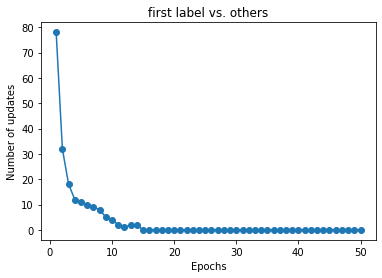

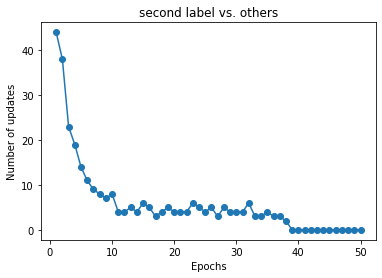

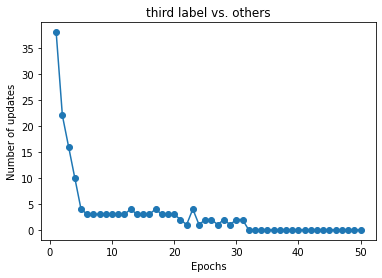

In [87]:
# Implementation for Perceptron
lr = [0.00005 * i for i in range(1, 20)]
acc_val = 0
lr_val = 0
iter_num = 50

ppn_f1, ppn_f2, ppn_f3 = None, None, None
for j in range(len(lr)):
    ppn_m1 = Perceptron(eta = lr[j], n_iter = iter_num)
    ppn_m2 = Perceptron(eta = lr[j], n_iter = iter_num)
    ppn_m3 = Perceptron(eta = lr[j], n_iter = iter_num)

    ppn_m1.fit(X_wine_std_train, y1_w)
    ppn_m2.fit(X_wine_std_train, y2_w)
    ppn_m3.fit(X_wine_std_train, y3_w)

    # find max of these models
    out = [0, 0, 0]
    corr = 0

    for i in range(len(X_wine_std_test)):
        out[0] = ppn_m1.net_input(X_wine_std_test[i])
        out[1] = ppn_m2.net_input(X_wine_std_test[i])
        out[2] = ppn_m3.net_input(X_wine_std_test[i])
        if out.index(max(out)) + 1 == y_wine_test[i]:
            corr += 1
    print(f'learning rate(eta) = {lr[j]:.5f}, accuracy = {corr / len(y_wine_test):.3f}')

    if corr / len(y_wine_test) > acc_val:
        acc_val = corr / len(y_wine_test)
        lr_val = lr[j]
        ppn_f1, ppn_f2, ppn_f3 = ppn_m1, ppn_m2, ppn_m3

print(f'\nFinal accuracy: {acc_val:.3f},  learning rate: {lr_val:.5f}')

plt.plot(range(1, len(ppn_f1.errors_) + 1), ppn_f1.errors_, marker='o')
plt.title('first label vs. others')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()
plt.plot(range(1, len(ppn_f2.errors_) + 1), ppn_f2.errors_, marker='o')
plt.title('second label vs. others')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()
plt.plot(range(1, len(ppn_f3.errors_) + 1), ppn_f3.errors_, marker='o')
plt.title('third label vs. others')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

learning rate(eta) = 0.00010, accuracy = 0.981
learning rate(eta) = 0.00020, accuracy = 0.981
learning rate(eta) = 0.00030, accuracy = 0.981
learning rate(eta) = 0.00040, accuracy = 0.981
learning rate(eta) = 0.00050, accuracy = 0.981
learning rate(eta) = 0.00060, accuracy = 0.981
learning rate(eta) = 0.00070, accuracy = 0.981
learning rate(eta) = 0.00080, accuracy = 0.981
learning rate(eta) = 0.00090, accuracy = 0.981
learning rate(eta) = 0.00100, accuracy = 0.981
learning rate(eta) = 0.00110, accuracy = 0.981
learning rate(eta) = 0.00120, accuracy = 0.981
learning rate(eta) = 0.00130, accuracy = 0.981
learning rate(eta) = 0.00140, accuracy = 0.981
learning rate(eta) = 0.00150, accuracy = 0.981
learning rate(eta) = 0.00160, accuracy = 0.981
learning rate(eta) = 0.00170, accuracy = 0.981
learning rate(eta) = 0.00180, accuracy = 0.981
learning rate(eta) = 0.00190, accuracy = 0.981

Final accuracy: 0.981,  learning rate: 0.00010


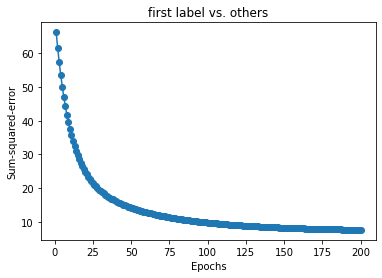

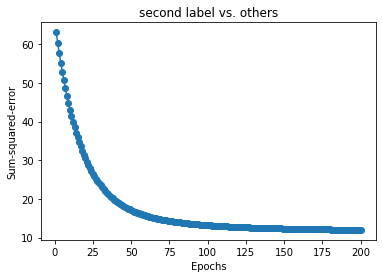

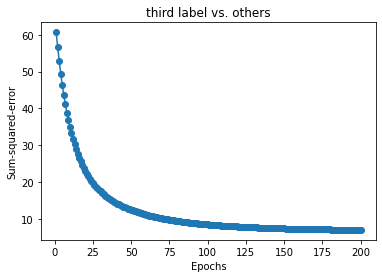

In [88]:
# Implementation for adaline

lr = [0.0001 * i for i in range(1, 20)]
Ada_acc_val = 0
Ada_lr_val = 0
ada_f1, ada_f2, ada_f3 = None, None, None
iter_ada_num = 200

for j in range(len(lr)):
    ada_m1 = AdalineGD(eta = lr[j], n_iter = iter_ada_num)
    ada_m2 = AdalineGD(eta = lr[j], n_iter = iter_ada_num)
    ada_m3 = AdalineGD(eta = lr[j], n_iter = iter_ada_num)

    ada_m1.fit(X_wine_std_train, y1_w)
    ada_m2.fit(X_wine_std_train, y2_w)
    ada_m3.fit(X_wine_std_train, y3_w)

    # find max of these models
    out = [0, 0, 0]
    corr = 0

    for i in range(len(X_wine_std_test)):
        out[0], out[1], out[2] = ada_m1.net_input(X_wine_std_test[i]), ada_m2.net_input(X_wine_std_test[i]), ada_m3.net_input(X_wine_std_test[i])
        if out.index(max(out)) + 1 == y_wine_test[i]:
            corr += 1
    print(f'learning rate(eta) = {lr[j]:.5f}, accuracy = {corr / len(y_wine_test):.3f}')

    if corr / len(y_wine_test) > Ada_acc_val:
        Ada_acc_val = corr / len(y_wine_test)
        Ada_lr_val = lr[j]
        ada_f1, ada_f2, ada_f3 = ada_m1, ada_m2, ada_m3

print(f'\nFinal accuracy: {Ada_acc_val:.3f},  learning rate: {Ada_lr_val:.5f}')


plt.plot(range(1, len(ada_f1.cost_) + 1), ada_f1.cost_, marker='o')
plt.title('first label vs. others')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()
plt.plot(range(1, len(ada_f2.cost_) + 1), ada_f2.cost_, marker='o')
plt.title('second label vs. others')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()
plt.plot(range(1, len(ada_f3.cost_) + 1), ada_f3.cost_, marker='o')
plt.title('third label vs. others')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

learning rate(eta) = 0.00050, accuracy = 0.830
learning rate(eta) = 0.00100, accuracy = 0.830
learning rate(eta) = 0.00150, accuracy = 0.830
learning rate(eta) = 0.00200, accuracy = 0.830
learning rate(eta) = 0.00250, accuracy = 0.830
learning rate(eta) = 0.00300, accuracy = 0.830
learning rate(eta) = 0.00350, accuracy = 0.830
learning rate(eta) = 0.00400, accuracy = 0.849
learning rate(eta) = 0.00450, accuracy = 0.830
learning rate(eta) = 0.00500, accuracy = 0.830
learning rate(eta) = 0.00550, accuracy = 0.830
learning rate(eta) = 0.00600, accuracy = 0.830
learning rate(eta) = 0.00650, accuracy = 0.830
learning rate(eta) = 0.00700, accuracy = 0.830
learning rate(eta) = 0.00750, accuracy = 0.830
learning rate(eta) = 0.00800, accuracy = 0.849
learning rate(eta) = 0.00850, accuracy = 0.849
learning rate(eta) = 0.00900, accuracy = 0.849
learning rate(eta) = 0.00950, accuracy = 0.849

Final accuracy: 0.849,  learning rate: 0.00400


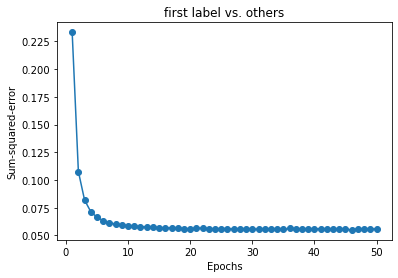

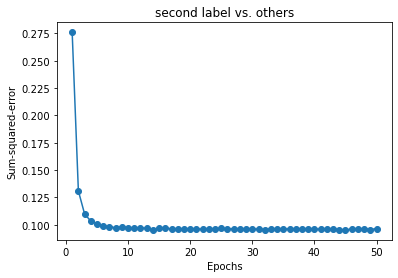

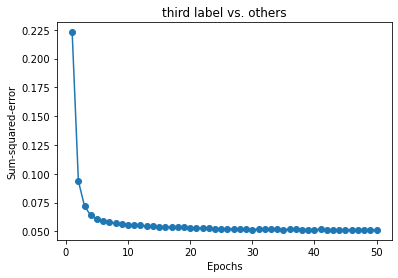

In [89]:
# Implementation for adaline SGD

lr = [0.0005 * i for i in range(1, 20)]
Ada_SGD_acc_val = 0
Ada_SGD_lr_val = 0
ada_SGD_f1, ada_SGD_f2, ada_SGD_f3 = None, None, None
iter_ada_SGD_num = 50

for j in range(len(lr)):
    ada_SGD_m1 = AdalineSGD(eta = lr[j], n_iter = iter_ada_SGD_num)
    ada_SGD_m2 = AdalineSGD(eta = lr[j], n_iter = iter_ada_SGD_num)
    ada_SGD_m3 = AdalineSGD(eta = lr[j], n_iter = iter_ada_SGD_num)

    ada_SGD_m1.fit(X_wine_std_train, y1_w)
    ada_SGD_m2.fit(X_wine_std_train, y2_w)
    ada_SGD_m3.fit(X_wine_std_train, y3_w)

    # find max of these models
    out = [0, 0, 0]
    corr = 0

    for i in range(len(X_std_test)):
        out[0], out[1], out[2] = ada_SGD_m1.net_input(X_wine_std_test[i]), ada_SGD_m2.net_input(X_wine_std_test[i]), ada_SGD_m3.net_input(X_wine_std_test[i])
        if out.index(max(out)) + 1 == y_wine_test[i]:
            corr += 1
    print(f'learning rate(eta) = {lr[j]:.5f}, accuracy = {corr / len(y_wine_test):.3f}')

    if corr / len(y_wine_test) > Ada_SGD_acc_val:
        Ada_SGD_acc_val = corr / len(y_wine_test)
        Ada_SGD_lr_val = lr[j]
        ada_SGD_f1, ada_SGD_f2, ada_SGD_f3 = ada_SGD_m1, ada_SGD_m2, ada_SGD_m3

print(f'\nFinal accuracy: {Ada_SGD_acc_val:.3f},  learning rate: {Ada_SGD_lr_val:.5f}')

plt.plot(range(1, len(ada_SGD_f1.cost_) + 1), ada_SGD_f1.cost_, marker='o')
plt.title('first label vs. others')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()
plt.plot(range(1, len(ada_SGD_f2.cost_) + 1), ada_SGD_f2.cost_, marker='o')
plt.title('second label vs. others')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()
plt.plot(range(1, len(ada_SGD_f3.cost_) + 1), ada_SGD_f3.cost_, marker='o')
plt.title('third label vs. others')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

### Discussion


綜合上述結果，可以發現Perceptron意外地達到了**100%**的準確度，而藉由觀察三個binary classifier的loss curve也能發現numbers of update全部都的確能收斂至0，也就是說在這樣的data分布下Perceptron能夠成功地把我所使用的test set進行很好的分類，得到無誤的結果，相當於準確率能達到100%<br>
<br>
接著，Adaline具有**98.1%**的準確度，而觀察Adaline演算法的sum square error所表示的loss curve，儘管三者皆有收斂的跡象，但仔細看可以發現在第2個label與其他的分類中，error並非收斂至0，也就是說在第2項label與其他進行分類時是有可能切分不完全的，故我認為是此處所導致的誤差<br>
<br>
最後便是AdalineSGD的做法，只具有**84.9%**的準確度，觀察loss curve容易發現，同樣於Adaline都有收斂的情況，但第2個label的loss就是收斂於比另外兩者還要大的值，加上wine data只有177組筆資料，在利用SGD進行實作時不一定能有更精確的結果，我認為若要改善此狀況應可嘗試增加data的數量，讓SGD在取batch的時候update weights做得更均勻、更佳

總結，我認為若是照著目前的設計實作，那Perceptron會有著最好的準確度，但若將data set增大不少後，便可考慮嘗試看看AdalineSGD的做法，理論上可以讓SGD有更好的發揮<br>
藉由這題的練習，利用features更多樣、較複雜的dataset，可以讓我們練習並更加熟悉三個經典演算法，以及調整參數的過程，而學到如何評估一個模型的優劣，以及學著探討應用上該如何選擇algorithm來解決問題
